In [1]:
from __future__ import annotations

import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
from torch.distributions.normal import Normal
from stable_baselines3 import PPO, TD3
import time
import gymnasium as gym
import pickle
import warnings
warnings.filterwarnings("ignore")


plt.rcParams["figure.figsize"] = (10, 5)

In [2]:
rewards_over_seeds = []


for seed in [1,2,3]:
    print(f"Starting seed {seed}")
    steps_in_seed = 0
    env_train_1 = gym.make("Humanoid-v4", healthy_reward = 10, forward_reward_weight = 0.625,  healthy_z_range=(0.9,2.0))
    env_train_2 = gym.make("Humanoid-v4", healthy_reward = 2.5, forward_reward_weight = 2.5, healthy_z_range=(0.9,2.0))
    env_test = gym.make("Humanoid-v4", healthy_z_range=(0.9,2.0))
    wrapped_env_train_1 = gym.wrappers.RecordEpisodeStatistics(env_train_1)  # Records episode-reward
    wrapped_env_train_2 = gym.wrappers.RecordEpisodeStatistics(env_train_2)
    wrapped_env_test = gym.wrappers.RecordEpisodeStatistics(env_test)

    # set seed
    torch.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)

    print(f"Starting 1st phase of training")
    agent = PPO('MlpPolicy', wrapped_env_train_1, verbose=0, tensorboard_log="./logs_changed")
    agent.learn(total_timesteps=700000,progress_bar=True, tb_log_name="PPO_1_"+str(seed), reset_num_timesteps=False)
    agent.save("agent_changed_1_"+str(seed))
    del agent
    env_train_1.close()
    print(f"Starting 2nd phase of training")
    agent = PPO.load("agent_changed_1_"+str(seed), env = wrapped_env_train_2)
    agent.learn(total_timesteps=1300000,progress_bar=True, tb_log_name="PPO_2_"+str(seed), reset_num_timesteps=False)
    agent.save("agent_changed_2_"+str(seed))
    del agent
    env_train_2.close()
    print(f"Starting testing phase")
    agent = PPO.load("agent_changed_2_"+str(seed), env = wrapped_env_test)
    reward_over_episodes = []


    for episode in range(1000):
        obs, info = wrapped_env_test.reset(seed=seed)

        done = False


        while not done:
            action, _states = agent.predict(obs)
            obs, reward, terminated, truncated, info = wrapped_env_test.step(action)
            done = terminated or truncated
            #wrapped_env_test.render()
        
        reward_over_episodes.append(wrapped_env_test.return_queue[-1][0])
    
    rewards_over_seeds.append(reward_over_episodes)
    env_test.close()
    print()

with open('rewards_changed', 'wb') as f:  
    pickle.dump(rewards_over_seeds, f)

Starting seed 3
Starting 1st phase of training


Output()

Starting 2nd phase of training


Output()

Starting testing phase



In [11]:
rewards_over_seeds = []


for seed in [1,2,3]:
    print(f"Starting seed {seed}")
    steps_in_seed = 0
    env_train = gym.make("Humanoid-v4")
    env_test = gym.make("Humanoid-v4", healthy_z_range=(0.9,2.0))
    wrapped_env_train = gym.wrappers.RecordEpisodeStatistics(env_train)  # Records episode-reward    
    wrapped_env_test = gym.wrappers.RecordEpisodeStatistics(env_test)

    # set seed
    torch.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)

    print(f"Starting training")
    agent = PPO('MlpPolicy', wrapped_env_train, verbose=0, tensorboard_log="./logs_default")
    agent.learn(total_timesteps=2000000,progress_bar=True, tb_log_name="PPO_"+str(seed), reset_num_timesteps=False)
    agent.save("agent_default_"+str(seed))
    del agent
    env_train.close()
    print(f"Starting testing phase")
    agent = PPO.load("agent_default_"+str(seed), env = wrapped_env_test)
    reward_over_episodes = []


    for episode in range(1000):
        obs, info = wrapped_env_test.reset(seed=seed)

        done = False


        while not done:
            action, _states = agent.predict(obs)
            obs, reward, terminated, truncated, info = wrapped_env_test.step(action)
            done = terminated or truncated
            #wrapped_env_test.render()
        
        reward_over_episodes.append(wrapped_env_test.return_queue[-1][0])
    
    rewards_over_seeds.append(reward_over_episodes)
    env_test.close()
    print()

with open('rewards_default', 'wb') as f:  
    pickle.dump(rewards_over_seeds, f)

Output()

Starting seed 1
Starting training


Starting testing phase


Output()


Starting seed 2
Starting training


Starting testing phase


Output()


Starting seed 3
Starting training


Starting testing phase



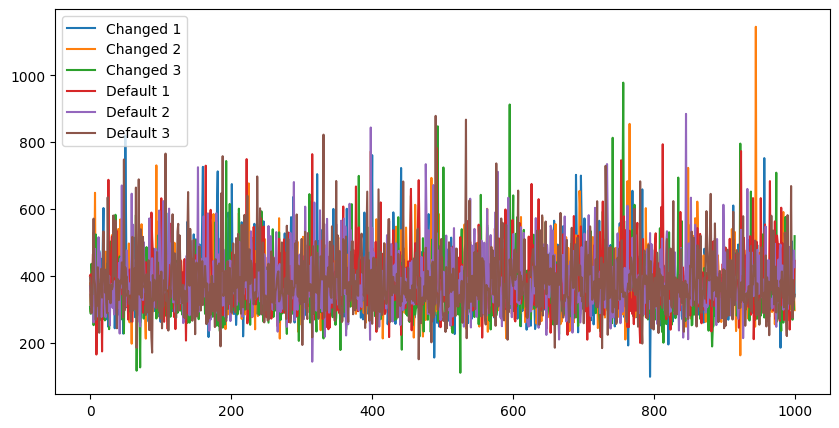

In [16]:
reward_changed = pickle.load(open("rewards_changed",'rb'))
reward_default = pickle.load(open("rewards_default",'rb'))

plt.plot(reward_changed[0], label="Changed 1")
plt.plot(reward_changed[1], label="Changed 2")
plt.plot(reward_changed[2], label="Changed 3")
plt.plot(reward_default[0], label="Default 1")
plt.plot(reward_default[1], label="Default 2")
plt.plot(reward_default[2], label="Default 3")
plt.legend()
plt.show()

#np.mean(reward_changed)
#np.mean(reward_default)


In [3]:
env_test = gym.make("Humanoid-v4", render_mode = "human", healthy_z_range=(0.9,2.0))
wrapped_env_test = gym.wrappers.RecordEpisodeStatistics(env_test)
agent = PPO.load("agent_default_1", env = wrapped_env_test)
seed = 42


for episode in range(10):
    obs, info = wrapped_env_test.reset(seed=seed)

    done = False


    while not done:
        action, _states = agent.predict(obs)
        obs, reward, terminated, truncated, info = wrapped_env_test.step(action)
        done = terminated or truncated
        wrapped_env_test.render()
            
env_test.close()
